# Env 环境变量

In [3]:
import os

ROOT_DATA = os.environ.get('LARD_DATA_ROOT_PATH')
ROOT_PROJECT = os.environ.get('LARD_PROJECT_ROOT_PATH')

print(ROOT_DATA)
print(ROOT_PROJECT)


/fileonssd/lard-dataset
/home/yeli/workspace/lard/lard-detection


In [ ]:
# https://github.com/ultralytics/ultralytics/blob/35233822d80622c66c0cec077326a181f8fa8621/ultralytics/utils/plotting.py#L609

# LARD

100%|██████████| 14431/14431 [00:00<00:00, 18234.58it/s]


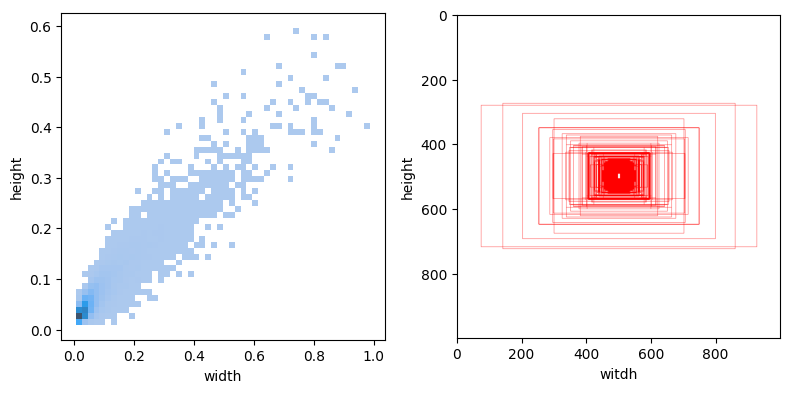

In [6]:
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np

path_train_all = f'{ROOT_PROJECT}/datasets/lard/detection/train_all/labels'

all_cls = []
all_bbox = []
for path in tqdm(glob.glob(f'{path_train_all}/*.txt')):
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            record = line.strip().split()
            cls = int(record[0])
            bbox = [float(x) for x in record[1:]]
            all_cls.append(cls)
            all_bbox.append(bbox)

all_cls = np.array(all_cls)
all_bbox = np.array(all_bbox)
df_bbox = pd.DataFrame(all_bbox, columns=["x", "y", "width", "height"])

def xywh2xyxy(arr):
    xy_min = arr[:, 0:2] - arr[:, 2:4] / 2
    xy_max = arr[:, 0:2] + arr[:, 2:4] / 2
    xyxy = np.concatenate((xy_min, xy_max), axis=1)
    return xyxy

# bbox distribution 长宽比分布
fig, ax = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)
sns.histplot(df_bbox, x="width", y="height", bins=50, pmax=0.9, ax=ax[0])

# bbox distribution 长宽比分布
all_bbox_plot = all_bbox.copy()  # limit to 1M boxes
all_bbox_plot[:, 0:2] = 0.5  # center
all_bbox_plot = xywh2xyxy(all_bbox_plot) * 1000
img = Image.fromarray(np.ones((1000, 1000, 3), dtype=np.uint8) * 255)
num_bbox = 500
random_indices = np.random.choice(range(0, len(all_bbox_plot)), num_bbox, replace=False)
for cls, box in zip(all_cls[random_indices], all_bbox_plot[random_indices]):
    ImageDraw.Draw(img).rectangle(list(box), width=1, outline=(255, 0, 0))  # plot
ax[1].imshow(img)
ax[1].set_xlabel('witdh')
ax[1].set_ylabel('height')

plt.show()

# COCO

  2%|▏         | 2813/117266 [00:00<00:07, 14374.16it/s]

100%|██████████| 117266/117266 [00:08<00:00, 13036.69it/s]


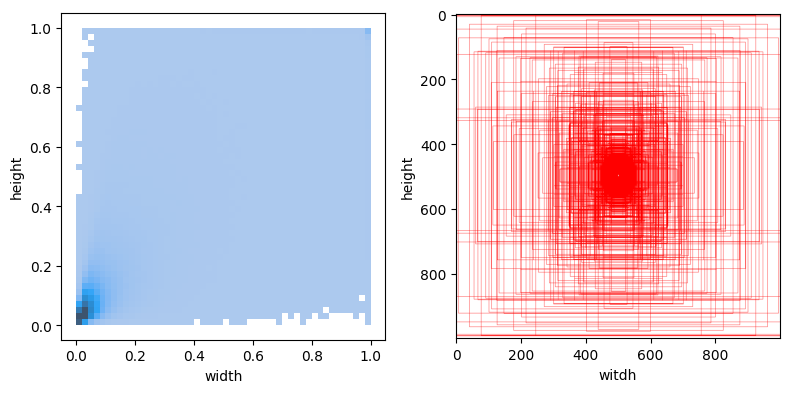

In [7]:
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np

path_train_all = f'{ROOT_PROJECT}/datasets/coco/labels/train2017'

all_cls = []
all_bbox = []
for path in tqdm(glob.glob(f'{path_train_all}/*.txt')):
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            record = line.strip().split()
            cls = int(record[0])
            bbox = [float(x) for x in record[1:]]
            all_cls.append(cls)
            all_bbox.append(bbox)

all_cls = np.array(all_cls)
all_bbox = np.array(all_bbox)
df_bbox = pd.DataFrame(all_bbox, columns=["x", "y", "width", "height"])

def xywh2xyxy(arr):
    xy_min = arr[:, 0:2] - arr[:, 2:4] / 2
    xy_max = arr[:, 0:2] + arr[:, 2:4] / 2
    xyxy = np.concatenate((xy_min, xy_max), axis=1)
    return xyxy

# bbox distribution 长宽比分布
fig, ax = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)
sns.histplot(df_bbox, x="width", y="height", bins=50, pmax=0.9, ax=ax[0])

# bbox distribution 长宽比分布
all_bbox_plot = all_bbox.copy()  # limit to 1M boxes
all_bbox_plot[:, 0:2] = 0.5  # center
all_bbox_plot = xywh2xyxy(all_bbox_plot) * 1000
img = Image.fromarray(np.ones((1000, 1000, 3), dtype=np.uint8) * 255)
num_bbox = 500
random_indices = np.random.choice(range(0, len(all_bbox_plot)), num_bbox, replace=False)
for cls, box in zip(all_cls[random_indices], all_bbox_plot[random_indices]):
    ImageDraw.Draw(img).rectangle(list(box), width=1, outline=(255, 0, 0))  # plot
ax[1].imshow(img)
ax[1].set_xlabel('witdh')
ax[1].set_ylabel('height')

plt.show()